# Unemployment Analysis with Python 

##### Business Problem:
The business problem is to analyze the unemployment rate, especially in the context of the sharp increase observed during the COVID-19 pandemic. This involves understanding the factors contributing to unemployment, identifying trends and patterns in unemployment data, and potentially developing strategies to address unemployment challenges.

##### Business Insight:
Analyzing the unemployment rate provides valuable insights into the economic health of a region or country. By understanding the underlying factors influencing unemployment, policymakers, businesses, and individuals can make informed decisions regarding workforce development, economic policies, job-seeking strategies, and investment opportunities. Moreover, analyzing the impact of external events, such as the COVID-19 pandemic, on unemployment rates can help in preparing for future crises and mitigating their effects.

##### Business Objective:
The primary business objective is to gain a comprehensive understanding of the unemployment rate, its trends, patterns, and drivers. This includes identifying key factors influencing unemployment, assessing the impact of external events (such as the COVID-19 pandemic) on unemployment dynamics, and exploring potential strategies to reduce unemployment and promote economic recovery. Additionally, the objective may involve developing predictive models to forecast future unemployment rates and assess the effectiveness of policy interventions.

In [1]:
# Importing libraries 
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import folium
from folium import Circle
from geopy import Nominatim

from sklearn.preprocessing import MinMaxScaler
from IPython.display import display

In [2]:
# Importing database 

data = pd.read_csv(r"C:\Users\kashinath konade\Downloads\Unemployment Analysis\Unemployment in India.csv")
print(data)

             Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019    Monthly                              3.65   
1    Andhra Pradesh   30-06-2019    Monthly                              3.05   
2    Andhra Pradesh   31-07-2019    Monthly                              3.75   
3    Andhra Pradesh   31-08-2019    Monthly                              3.32   
4    Andhra Pradesh   30-09-2019    Monthly                              5.17   
..              ...          ...        ...                               ...   
763             NaN          NaN        NaN                               NaN   
764             NaN          NaN        NaN                               NaN   
765             NaN          NaN        NaN                               NaN   
766             NaN          NaN        NaN                               NaN   
767             NaN          NaN        NaN                               NaN   

      Estimated Employed   

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [4]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [5]:
data.sample(5)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
636,Punjab,30-11-2019,Monthly,10.39,3602243.0,41.82,Urban
376,Andhra Pradesh,31-08-2019,Monthly,4.61,4743179.0,36.29,Urban
357,West Bengal,31-05-2020,Monthly,18.43,19115772.0,42.53,Rural
632,Punjab,31-07-2019,Monthly,11.61,3592442.0,42.62,Urban
201,Maharashtra,31-05-2020,Monthly,16.89,18423447.0,41.21,Rural


In [6]:
data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [7]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [8]:
# Checking the duplicate value 
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763     True
764     True
765     True
766     True
767     True
Length: 768, dtype: bool

In [9]:
# Checking the missing values 
data.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [10]:
# Droping the duplicated values 
data.drop_duplicates(inplace = True)


In [11]:
data.shape

(741, 7)

In [12]:
data.isnull().sum().sum()

7

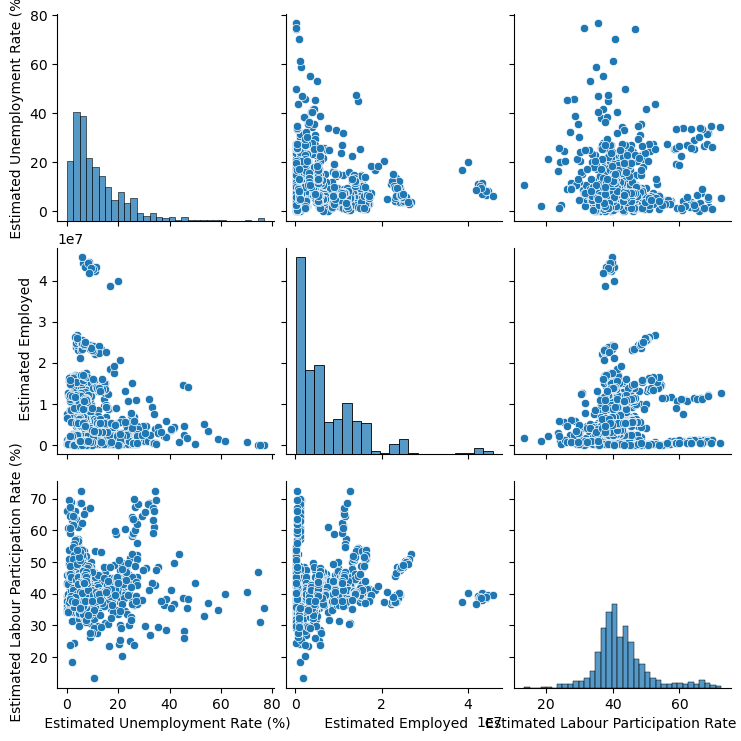

In [13]:
sns.pairplot(data)

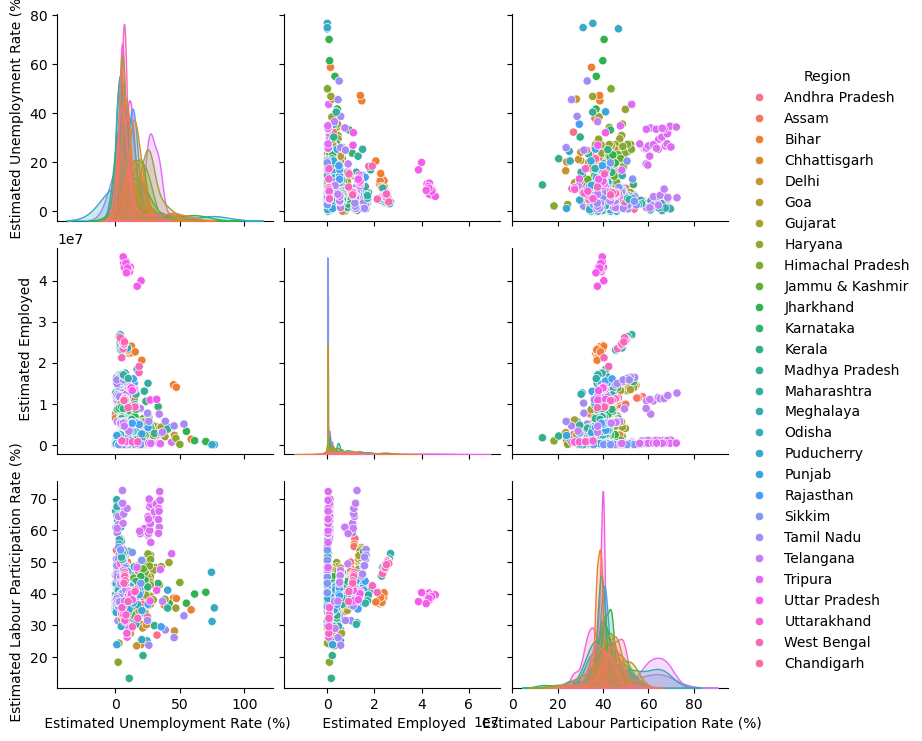

In [14]:
sns.pairplot(data = data , hue = 'Region')


In [15]:
data.Region.unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', nan, 'Chandigarh'],
      dtype=object)

<Axes: ylabel='Area'>

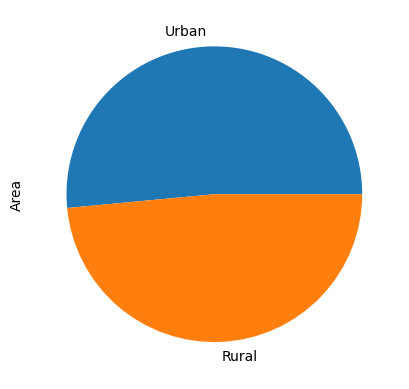

In [16]:
data['Area'].value_counts().plot.pie()


<Axes: ylabel='Region'>

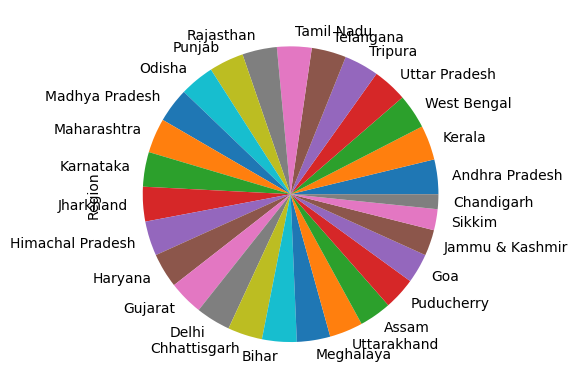

In [17]:
data['Region'].value_counts().plot.pie()


<Axes: >

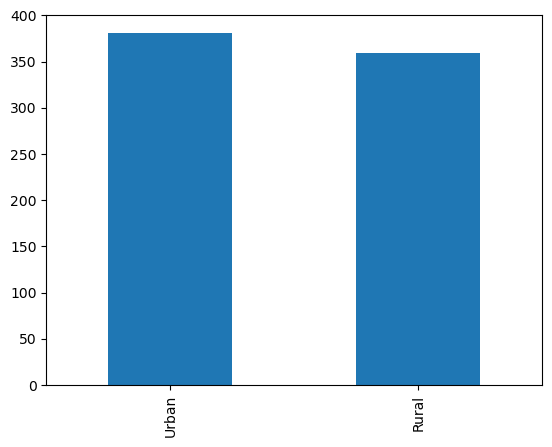

In [18]:
data['Area'].value_counts().plot.bar()
